In [37]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, make_scorer
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.compose import TransformedTargetRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [38]:
data = pd.read_csv('data.csv')

In [39]:
data.set_index('OSEBuildingID', inplace = True)

In [40]:
data

,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,EnergyStarNaN,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age,PropertyGFAParking(%),PropertyGFABuilding(s)(%),SteamUse(%),Electricity(%),NaturalGas(%),PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,12.0,88434.0,88434.0,60.0,0.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,249.98,2.83,89.0,0.000000,100.000000,27.730162,54.605993,17.663838,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,11.0,103566.0,83880.0,61.0,0.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,295.86,2.86,20.0,14.545314,85.454686,0.000000,38.660907,61.339093,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,41.0,956110.0,756493.0,43.0,0.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,2089.28,2.19,47.0,20.574829,79.425171,29.711308,68.230741,2.057944,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1.0,10.0,61320.0,61320.0,56.0,0.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,286.43,4.67,90.0,0.000000,100.000000,32.591344,40.751928,26.656717,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.0,18.0,175580.0,123445.0,75.0,0.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,505.01,2.88,36.0,35.311539,64.688461,0.000000,37.880168,62.119825,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,1.0,1.0,12294.0,12294.0,46.0,0.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,20.94,1.70,26.0,0.000000,100.000000,0.000000,61.697384,38.302639,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50223,1.0,1.0,16000.0,16000.0,0.0,1.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,32.17,2.01,12.0,0.000000,100.000000,0.000000,41.729558,58.270426,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50224,1.0,1.0,13157.0,7583.0,0.0,1.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,223.54,16.99,42.0,0.000000,100.000000,0.000000,31.082041,68.917956,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
data.shape

(1648, 41)

In [42]:
"""data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]"""

'data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]'

In [95]:
X = data[['Age','NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking(%)',
        'PropertyGFABuilding(s)(%)','LargestPropertyUseTypeGFA','ENERGYSTARScore','EnergyStarNaN',
        'PrimaryPropertyType_Distribution Center', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_University', 'PrimaryPropertyType_Warehouse',
       'PrimaryPropertyType_Worship Facility','CouncilDistrictCode_1',
       'CouncilDistrictCode_2', 'CouncilDistrictCode_3',
       'CouncilDistrictCode_4', 'CouncilDistrictCode_5',
       'CouncilDistrictCode_6', 'CouncilDistrictCode_7']]


y = data['TotalGHGEmissions']

In [96]:
X.shape

(1648, 30)

In [97]:
y.head()

OSEBuildingID
1     249.98
2     295.86
3    2089.28
5     286.43
8     505.01
Name: TotalGHGEmissions, dtype: float64

In [98]:
std_scale = StandardScaler().fit(X)
X_scale = std_scale.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

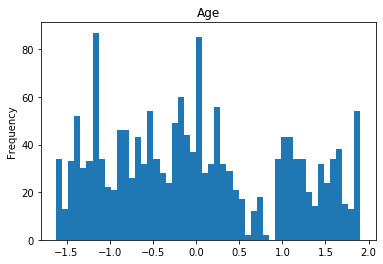

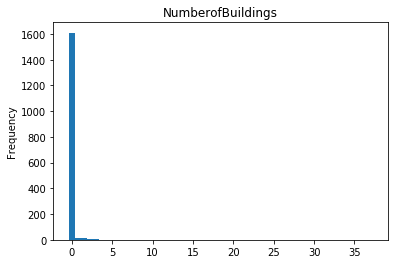

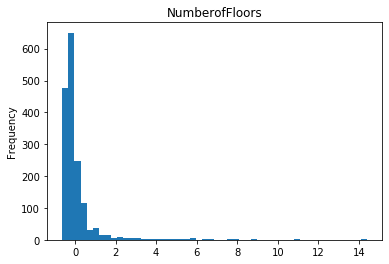

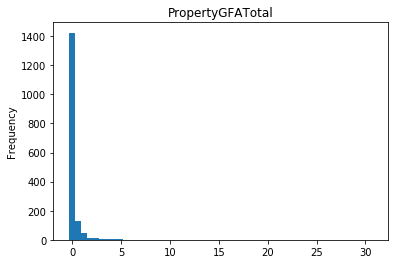

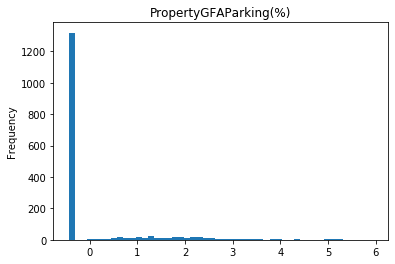

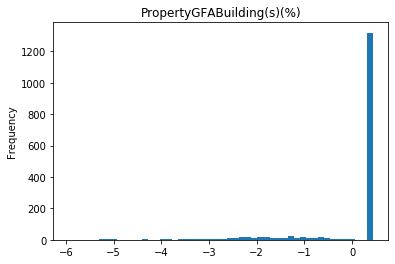

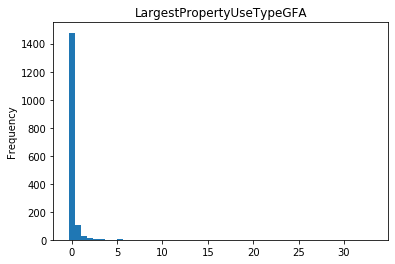

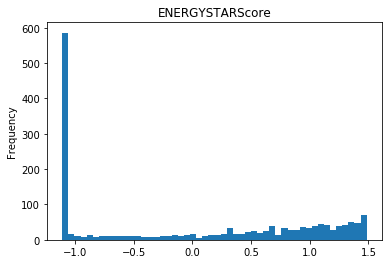

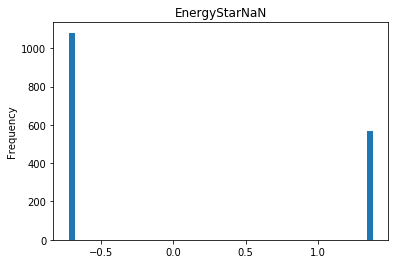

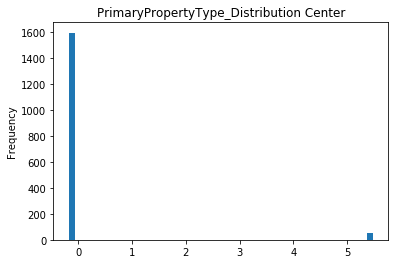

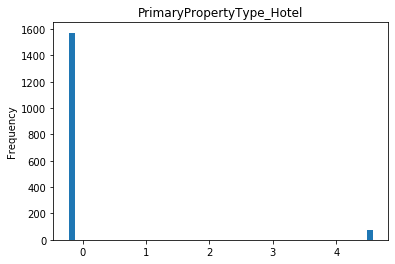

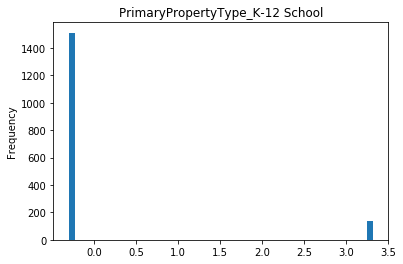

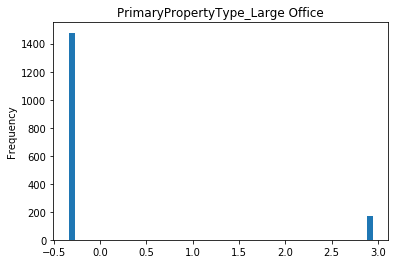

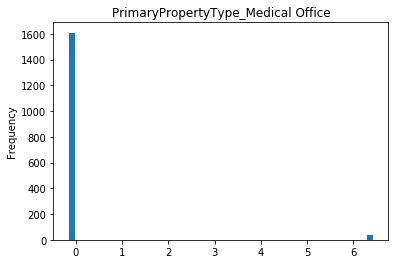

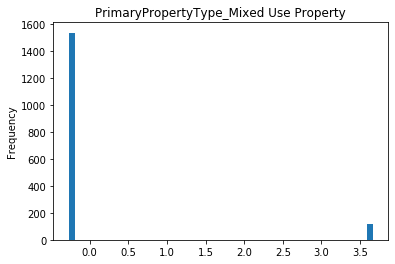

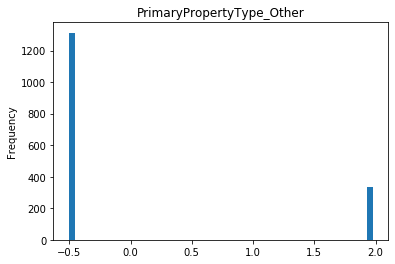

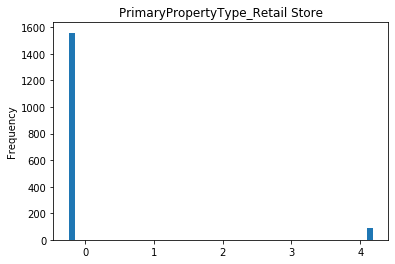

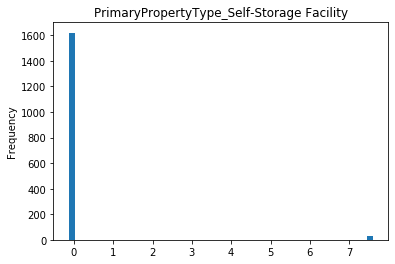

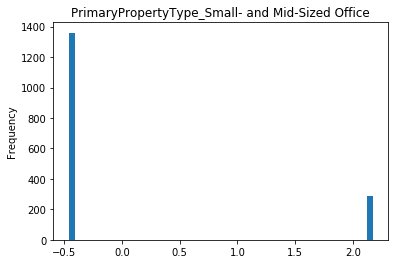

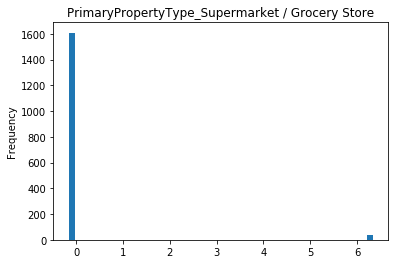

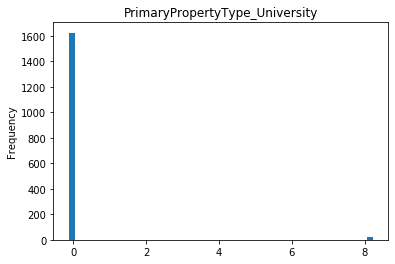

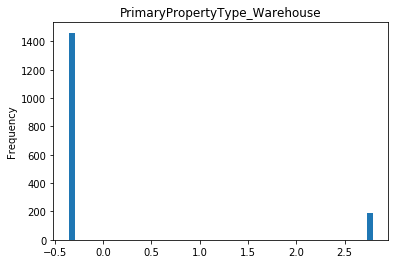

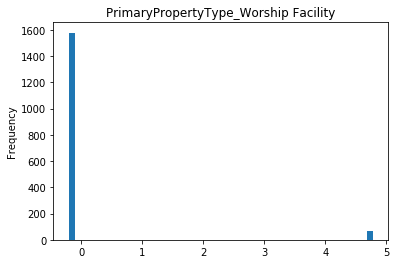

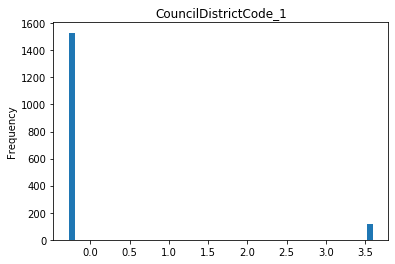

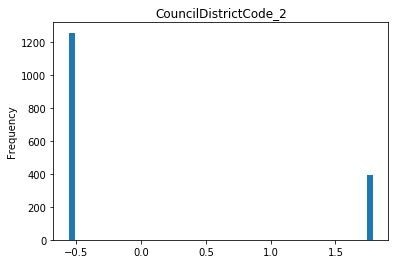

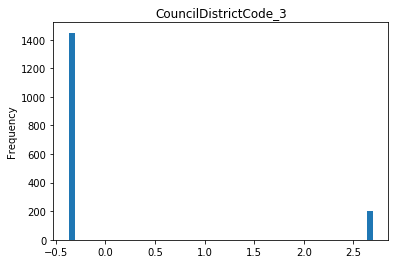

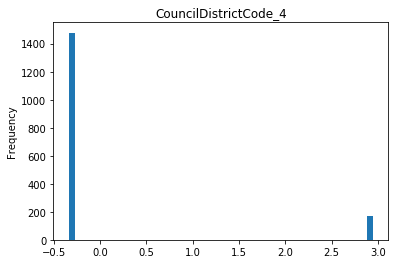

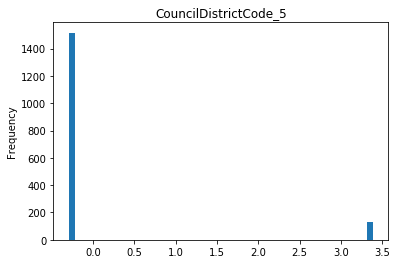

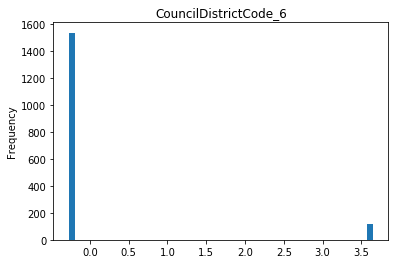

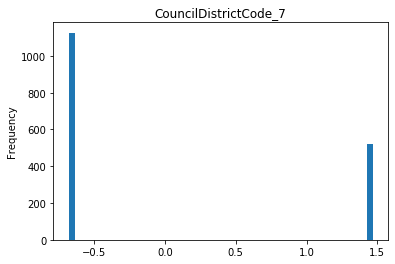

In [101]:
for col in X_scale.columns:
   X_scale[col].dropna().plot.hist(bins=50, logx=False)
   plt.title(col)
   plt.show()

In [99]:
X_scale = pd.DataFrame(X_scale, columns = X_train.columns)

In [48]:
dr = DummyRegressor(strategy="mean")
dr.fit(X_train, y_train)
baseline_error = mean_squared_error(y_test, dr.predict(y_test), squared=False)
baseline_error

968.2106104387265

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_error = mean_squared_error(y_test, lr.predict(X_test), squared=False)
lr_error

849.8922184330842

In [50]:
n_alphas = 100
alphas = np.logspace(-1, 7, n_alphas)

ridge = Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, mean_squared_error(y_test, ridge.predict(X_test), squared=False)])

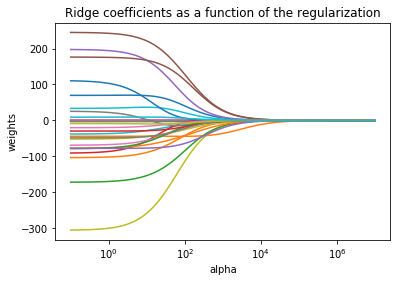

In [51]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

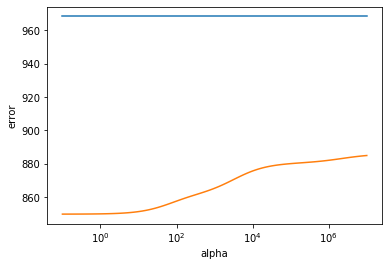

In [52]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [53]:
np.min(errors)

849.9088272628279

In [54]:
errors.index(min(errors))

0

In [55]:
errors[errors.index(min(errors))]

[968.2106104387265, 849.9088272628279]

In [56]:
alphas[errors.index(min(errors))]

0.1

In [57]:
ridge.set_params(alpha = alphas[errors.index(min(errors))])
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [58]:
mean_squared_error(y_test, ridge.predict(X_test), squared=False)

849.9088272628279

In [59]:
n_alphas = 100
alphas = np.logspace(-1, 4, n_alphas)
lasso = Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

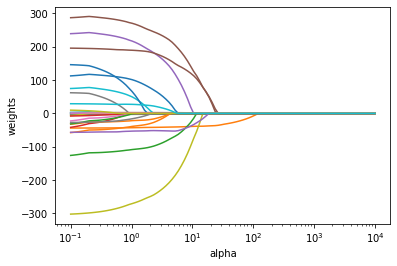

In [60]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

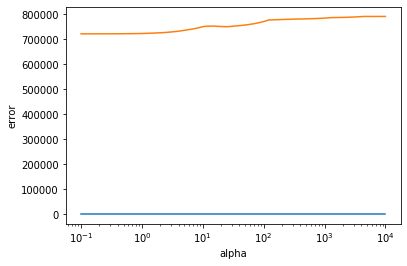

In [61]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [62]:
np.min(errors)

968.2106104387265

In [63]:
errors.index(min(errors))

0

In [64]:
alphas[errors.index(min(errors))]

0.1

In [65]:
lasso.set_params(alpha = alphas[errors.index(min(errors))])
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
mean_squared_error(y_test, lasso.predict(X_test), squared=False)

849.9231680542248

In [67]:
rmse_scorer = make_scorer(np.sqrt, greater_is_better=True)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=True)
msle_scorer = make_scorer(mean_squared_log_error, greater_is_better=True)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=True)

In [68]:
'''def resultize(grid): 
    results = pd.DataFrame(grid.cv_results_)
    results = results.sort_values(by='rank_test_rmse')
    results = results[['param_alpha', 'mean_test_rmse', 'mean_test_mse',
    'mean_test_msle', 'mean_test_mae']]
    results.columns = ['alpha', 'RMSE', 'MSE', 'MSLE', 'MAE']
    return results'''


"def resultize(grid): \n    results = pd.DataFrame(grid.cv_results_)\n    results = results.sort_values(by='rank_test_rmse')\n    results = results[['param_alpha', 'mean_test_rmse', 'mean_test_mse',\n    'mean_test_msle', 'mean_test_mae']]\n    results.columns = ['alpha', 'RMSE', 'MSE', 'MSLE', 'MAE']\n    return results"

In [69]:
def resultize(grid):

    res = pd.DataFrame(grid.cv_results_)
    cols = [i for i in res.columns if "split" not in i]
    res = res[cols].sort_values('rank_test_score')
    res = res[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
    res['mean_test_score'] = (-res['mean_test_score'])
    return res

In [70]:
def resultize_RMSE(grid): 
      results = pd.DataFrame(grid.cv_results_)
      results = results.sort_values(by = 'rank_test_score')
      results = results[['params', 'mean_test_score', 'rank_test_score']]
      results['mean_test_score'] = mean_squared_error(y_test, grid.predict(X_test), squared=False)
      return results

In [71]:
params = {'alpha': np.logspace(0, 7, 20)}
grid_ridge = GridSearchCV(Ridge(), params, cv = 10, 
                  scoring = 'neg_root_mean_squared_error', n_jobs=-1)
grid_ridge.fit(X_train, y_train)
grid_ridge_best_params = grid_ridge.best_params_
resultize_RMSE(grid_ridge).head()

,params,mean_test_score,rank_test_score
19,{'alpha': 10000000.0},884.981351,1
18,{'alpha': 4281332.398719387},884.981351,2
17,{'alpha': 1832980.7108324338},884.981351,3
16,{'alpha': 784759.9703514606},884.981351,4
15,{'alpha': 335981.8286283781},884.981351,5


In [72]:
grid_rf_best_params = {'alpha': 10000000.0}

In [73]:
rf = Ridge(**grid_rf_best_params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_error = mean_squared_error(y_test, y_pred, squared=False)
rf_error

884.9813508958995

In [74]:
params = {"alpha": np.logspace(-1, 3, 30)}
grid_lasso = GridSearchCV(Lasso(), params, cv = 10)
grid_lasso.fit(X_train, y_train)
grid_lasso_best_params = grid_lasso.best_params_
resultize_RMSE(grid_lasso).head()

,params,mean_test_score,rank_test_score
28,{'alpha': 727.8953843983146},883.203511,1
29,{'alpha': 1000.0},883.203511,2
27,{'alpha': 529.8316906283708},883.203511,3
26,{'alpha': 385.6620421163472},883.203511,4
25,{'alpha': 280.72162039411756},883.203511,5


In [75]:
grid_lasso_best_params = {'alpha': 727.8953843983146}	

In [76]:
lasso = Lasso(**grid_lasso_best_params)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso_error = mean_squared_error(y_test, y_pred, squared=False)
lasso_error

883.2035108169292

In [77]:
tt_ridge = TransformedTargetRegressor(regressor = Ridge(),
                               func = np.log1p,
                               inverse_func = np.expm1)
tt_ridge.fit(X_train, y_train)
y_pred = tt_ridge.predict(X_test)
tt_ridge_error = mean_squared_error(y_test, y_pred, squared=False)
tt_ridge_error

953.6306739627747

In [78]:
params = {'regressor__alpha': np.logspace(0, 7, 100)}
grid_tt_ridge = GridSearchCV(tt_ridge, params, cv = 10)
grid_tt_ridge.fit(X_train, y_train)
grid_tt_ridge_best_params = grid_tt_ridge.best_params_
resultize_RMSE(grid_tt_ridge).head()

,params,mean_test_score,rank_test_score
99,{'regressor__alpha': 10000000.0},975.199823,1
98,{'regressor__alpha': 8497534.359086439},975.199823,2
97,{'regressor__alpha': 7220809.018385456},975.199823,3
96,{'regressor__alpha': 6135907.273413164},975.199823,4
95,{'regressor__alpha': 5214008.287999685},975.199823,5


In [79]:
grid_tt_ridge_best_params = {'alpha': 10000000.0}

In [80]:
tt_ridge = TransformedTargetRegressor(regressor = Ridge(**grid_tt_ridge_best_params),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
tt_ridge.fit(X_train, y_train)
y_pred = tt_ridge.predict(X_test)
tt_ridge_error = mean_squared_error(y_test, y_pred, squared=False)
tt_ridge_error

975.1998229971124

In [81]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr_error = mean_squared_error(y_test, y_pred, squared=False)
svr_error

969.5070583197254

In [82]:
params = {'kernel': ['sigmoid','rbf','poly'],
         'C': [0.1,1,100,1000],
         'degree': [1,2,3,4,5,6]}
grid_svr = GridSearchCV(SVR(), params, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_svr.fit(X_train, y_train)
best_params_svr = grid_svr.best_params_
resultize(grid_svr).head()

KeyboardInterrupt: 

In [ ]:
ffsf

In [ ]:
'''params = {'kernel': ['sigmoid','rbf','poly','sigmoid'],
         'C': [0.1,1,100,1000],
         'degree': [1,2,3,4,5,6]}
grid = GridSearchCV(SVR(), params, cv=10)
grid.fit(X_train, y_train)
best_params_svr = grid.best_params_
resultize(grid).head()'''

"params = {'kernel': ['sigmoid','rbf','poly','sigmoid'],\n         'C': [0.1,1,100,1000],\n         'degree': [1,2,3,4,5,6]}\ngrid = GridSearchCV(SVR(), params, cv=10)\ngrid.fit(X_train, y_train)\nbest_params_svr = grid.best_params_\nresultize(grid).head()"

In [ ]:
best_params_svr = {'C': 1000, 'degree': 6, 'kernel': 'rbf'}

In [ ]:
svr = SVR(**best_params_svr)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

398.0529194444658

In [ ]:
tt = TransformedTargetRegressor(regressor = SVR(**best_params_svr),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
tt.fit(X_train, y_train)
y_pred = tt.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

1082.9415114920407

In [ ]:
'''tt = TransformedTargetRegressor(regressor = SVR(),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
params = {'regressor__C': [0.1,1,100,1000],
            'regressor__degree': [1,2,3,4,5,6],
            'regressor__kernel': ['sigmoid','rbf','poly']}
grid = GridSearchCV(tt, params, cv = 10)
grid.fit(X_train, y_train)
best_params_svr_tt = grid.best_params_
resultize(grid).head()'''

"tt = TransformedTargetRegressor(regressor = SVR(),\n                                    func = np.log1p,\n                                    inverse_func = np.expm1)\nparams = {'regressor__C': [0.1,1,100,1000],\n            'regressor__degree': [1,2,3,4,5,6],\n            'regressor__kernel': ['sigmoid','rbf','poly']}\ngrid = GridSearchCV(tt, params, cv = 10)\ngrid.fit(X_train, y_train)\nbest_params_svr_tt = grid.best_params_\nresultize(grid).head()"

In [ ]:
'''tt = TransformedTargetRegressor(regressor = SVR(**best_params_svr_tt),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
tt.fit(X_train, y_train)
y_pred = tt.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)'''

'tt = TransformedTargetRegressor(regressor = SVR(**best_params_svr_tt),\n                                    func = np.log1p,\n                                    inverse_func = np.expm1)\ntt.fit(X_train, y_train)\ny_pred = tt.predict(X_test)\nmean_squared_error(y_test, y_pred, squared=False)'

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

328.97420701191714

In [ ]:
"""params = {'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [1,2,3,4,5,6,7,8,9,10],
            'min_samples_split': [2,3,4,5,6,7,8,9,10],
}
grid = GridSearchCV(RandomForestRegressor(), params, cv=10)
grid.fit(X_train, y_train)
best_params_rf = grid.best_params_
resultize(grid).head()"""

"params = {'n_estimators': [100, 200, 300, 400, 500],\n            'max_depth': [1,2,3,4,5,6,7,8,9,10],\n            'min_samples_split': [2,3,4,5,6,7,8,9,10],\n}\ngrid = GridSearchCV(RandomForestRegressor(), params, cv=10)\ngrid.fit(X_train, y_train)\nbest_params_rf = grid.best_params_\nresultize(grid).head()"

In [ ]:
best_params_rf ={'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
rf = RandomForestRegressor(**best_params_rf)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

337.93590177576345

In [ ]:
tt = TransformedTargetRegressor(regressor = RandomForestRegressor(**best_params_rf),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
tt.fit(X_train, y_train)
y_pred = tt.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

323.243860619088

In [ ]:
'''tt_rf = TransformedTargetRegressor(regressor = RandomForestRegressor(),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
params = {'regressor__n_estimators': [100, 200, 300, 400, 500],
            'regressor__max_depth': [1,2,3,4,5,6,7,8,9,10],
            'regressor__min_samples_split': [2,3,4,5,6,7,8,9,10]}
grid = GridSearchCV(tt_rf, params, cv = 10)
grid.fit(X_train, y_train)
best_params_rf_tt = grid.best_params_
resultize(grid).head()'''

"tt_rf = TransformedTargetRegressor(regressor = RandomForestRegressor(),\n                                    func = np.log1p,\n                                    inverse_func = np.expm1)\nparams = {'regressor__n_estimators': [100, 200, 300, 400, 500],\n            'regressor__max_depth': [1,2,3,4,5,6,7,8,9,10],\n            'regressor__min_samples_split': [2,3,4,5,6,7,8,9,10]}\ngrid = GridSearchCV(tt_rf, params, cv = 10)\ngrid.fit(X_train, y_train)\nbest_params_rf_tt = grid.best_params_\nresultize(grid).head()"

In [ ]:
best_params_rf_tt = {'max_depth': 10,
 'min_samples_split': 4,
 'n_estimators': 200}
rf_tt = TransformedTargetRegressor(
      regressor = RandomForestRegressor(**best_params_rf_tt),
      func = np.log1p,
      inverse_func = np.expm1)
rf_tt.fit(X_train, y_train)
y_pred = rf_tt.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

317.2140570409817

In [ ]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

326.5484564509296

In [ ]:
'''params = {'loss': ['ls', 'lad', 'huber', 'quantile'],
            'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'max_depth': [4, 6],
            'min_samples_leaf': [3, 5, 9, 17],
}
grid = GridSearchCV(GradientBoostingRegressor(), params, cv=10)
grid.fit(X_train, y_train)
best_params_gb = grid.best_params_
resultize(grid).head()'''

"params = {'loss': ['ls', 'lad', 'huber', 'quantile'],\n            'learning_rate': [0.1, 0.05, 0.02, 0.01],\n            'max_depth': [4, 6],\n            'min_samples_leaf': [3, 5, 9, 17],\n}\ngrid = GridSearchCV(GradientBoostingRegressor(), params, cv=10)\ngrid.fit(X_train, y_train)\nbest_params_gb = grid.best_params_\nresultize(grid).head()"

In [ ]:
best_params_gb = {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 6, 'min_samples_leaf': 9}

In [ ]:
gb = GradientBoostingRegressor(**best_params_gb)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

337.4644256931685

In [ ]:
'''tt_gb = TransformedTargetRegressor(regressor = GradientBoostingRegressor(),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
params = {'regressor__loss': ['ls', 'lad', 'huber', 'quantile'],
            'regressor__learning_rate': [0.1, 0.05, 0.02, 0.01],
            'regressor__max_depth': [4, 6],
            'regressor__min_samples_leaf': [3, 5, 9, 17]}
grid = GridSearchCV(tt_gb, params, cv = 10)
grid.fit(X_train, y_train)
best_params_gb_tt = grid.best_params_
resultize(grid).head()'''

"tt_gb = TransformedTargetRegressor(regressor = GradientBoostingRegressor(),\n                                    func = np.log1p,\n                                    inverse_func = np.expm1)\nparams = {'regressor__loss': ['ls', 'lad', 'huber', 'quantile'],\n            'regressor__learning_rate': [0.1, 0.05, 0.02, 0.01],\n            'regressor__max_depth': [4, 6],\n            'regressor__min_samples_leaf': [3, 5, 9, 17]}\ngrid = GridSearchCV(tt_gb, params, cv = 10)\ngrid.fit(X_train, y_train)\nbest_params_gb_tt = grid.best_params_\nresultize(grid).head()"

In [ ]:
best_params_gb_tt = {'learning_rate': 0.1,
      'loss': 'ls',
      'max_depth': 6,
      'min_samples_leaf': 5
      }
gb_tt = TransformedTargetRegressor(regressor=GradientBoostingRegressor(**best_params_gb_tt),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
gb_tt.fit(X_train, y_train)
y_pred = gb_tt.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

210.35251382711084

In [ ]:
ad =  AdaBoostRegressor()
ad.fit(X_train, y_train)
y_pred = ad.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

473.62101856693846

In [ ]:
'''params = {'n_estimators': [100, 200, 300, 400, 500],
            'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'loss': ['linear', 'square', 'exponential'],
}
grid = GridSearchCV(AdaBoostRegressor(), params, cv=10)
grid.fit(X_train, y_train)
best_params_ad = grid.best_params_
resultize(grid).head()'''

"params = {'n_estimators': [100, 200, 300, 400, 500],\n            'learning_rate': [0.1, 0.05, 0.02, 0.01],\n            'loss': ['linear', 'square', 'exponential'],\n}\ngrid = GridSearchCV(AdaBoostRegressor(), params, cv=10)\ngrid.fit(X_train, y_train)\nbest_params_ad = grid.best_params_\nresultize(grid).head()"

In [ ]:
best_params_ad = {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 400}

In [ ]:
ad = AdaBoostRegressor(**best_params_ad)
ad.fit(X_train, y_train)
y_pred = ad.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

369.1583133859532

In [ ]:
"""tt_ad = TransformedTargetRegressor(regressor = AdaBoostRegressor(),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
params = {'regressor__n_estimators': [100, 200, 300, 400, 500],
            'regressor__learning_rate': [0.1, 0.05, 0.02, 0.01],
            'regressor__loss': ['linear', 'square', 'exponential'],
}
grid = GridSearchCV(tt_ad, params, cv = 10)
grid.fit(X_train, y_train)
best_params_ad_tt = grid.best_params_
resultize(grid).head()"""

"tt_ad = TransformedTargetRegressor(regressor = AdaBoostRegressor(),\n                                    func = np.log1p,\n                                    inverse_func = np.expm1)\nparams = {'regressor__n_estimators': [100, 200, 300, 400, 500],\n            'regressor__learning_rate': [0.1, 0.05, 0.02, 0.01],\n            'regressor__loss': ['linear', 'square', 'exponential'],\n}\ngrid = GridSearchCV(tt_ad, params, cv = 10)\ngrid.fit(X_train, y_train)\nbest_params_ad_tt = grid.best_params_\nresultize(grid).head()"

In [ ]:
best_params_ad_tt = {'learning_rate': 0.1,
      'loss': 'square',
      'n_estimators': 200
      }
tt_ad = TransformedTargetRegressor(regressor=AdaBoostRegressor(**best_params_ad_tt),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
tt_ad.fit(X_train, y_train)
y_pred = tt_ad.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

348.6998131735482

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

434.77462668189395

In [ ]:
'''params = {'hidden_layer_sizes': [(100,),(200,),(300,),(400,),(500,)],
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'adam'],
}
grid = GridSearchCV(MLPRegressor(), params, cv=10)
grid.fit(X_train, y_train)
best_params_mlp = grid.best_params_
resultize(grid).head()'''

"params = {'hidden_layer_sizes': [(100,),(200,),(300,),(400,),(500,)],\n            'activation': ['identity', 'logistic', 'tanh', 'relu'],\n            'solver': ['lbfgs', 'adam'],\n}\ngrid = GridSearchCV(MLPRegressor(), params, cv=10)\ngrid.fit(X_train, y_train)\nbest_params_mlp = grid.best_params_\nresultize(grid).head()"

In [ ]:
best_params_mlp = {'activation': 'logistic',
                  'hidden_layer_sizes': (200,), 
                  'solver': 'lbfgs'}

In [ ]:
mlp = MLPRegressor(**best_params_mlp)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

284.69790583780997

In [ ]:
"""tt_mlp = TransformedTargetRegressor(regressor = MLPRegressor(),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
params = {'regressor__hidden_layer_sizes': [(100,),(200,),(300,),(400,),(500,)],
            'regressor__activation': ['identity', 'logistic', 'tanh', 'relu'],
            'regressor__solver': ['lbfgs', 'adam'],
}
grid = GridSearchCV(tt_mlp, params, cv = 10)
grid.fit(X_train, y_train)
best_params_mlp_tt = grid.best_params_
resultize(grid).head()"""

"tt_mlp = TransformedTargetRegressor(regressor = MLPRegressor(),\n                                    func = np.log1p,\n                                    inverse_func = np.expm1)\nparams = {'regressor__hidden_layer_sizes': [(100,),(200,),(300,),(400,),(500,)],\n            'regressor__activation': ['identity', 'logistic', 'tanh', 'relu'],\n            'regressor__solver': ['lbfgs', 'adam'],\n}\ngrid = GridSearchCV(tt_mlp, params, cv = 10)\ngrid.fit(X_train, y_train)\nbest_params_mlp_tt = grid.best_params_\nresultize(grid).head()"

In [ ]:
best_params_mlp_tt = {'activation': 'tanh',
      'hidden_layer_sizes': (100,),
      'solver': 'adam'
      }
tt_mlp = TransformedTargetRegressor(regressor=MLPRegressor(**best_params_mlp_tt),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
tt_mlp.fit(X_train, y_train)
y_pred = tt_mlp.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

281.99836465827303